## 영어 텍스트 분석

<br>

- pip install nltk 설치 후 진행.
- nltk.download()를 통해 데이터를 받자.
    * 이미 설치도 되어있고, download()로 안받아도 앵간한건 다 설치되어있다.

In [2]:
import nltk

# 패키지 설치 확인
from nltk.corpus import brown
brown.words()

# 불용어 제거를 위한 불용어 사전 Load
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [3]:
# 분석할 파일
data1 = """ i love apple. apple. apple and orange. orange and banana.
            i don't love peach """
data1

" i love apple. apple. apple and orange. orange and banana.\n            i don't love peach "

In [4]:
# Tokenize - 단어 별로 잘라내기.
data2 = nltk.word_tokenize(data1)
data2

['i',
 'love',
 'apple',
 '.',
 'apple',
 '.',
 'apple',
 'and',
 'orange',
 '.',
 'orange',
 'and',
 'banana',
 '.',
 'i',
 'do',
 "n't",
 'love',
 'peach']

**word_tokenize()의 문제점?**

<br>

    축약형 단어를 제대로 분류할 수 없음.
    WordPunctTokenizer()를 자주 사용함.
    

In [6]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
new_data2 = tokenizer.tokenize(data1)
new_data2

['i',
 'love',
 'apple',
 '.',
 'apple',
 '.',
 'apple',
 'and',
 'orange',
 '.',
 'orange',
 'and',
 'banana',
 '.',
 'i',
 'don',
 "'",
 't',
 'love',
 'peach']

In [7]:
# 축약형 단어의 경우, 축약된 단어를 분리하지 않고 출력하고 싶을 경우?
# 정규식 표현 이용.
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
new_data3 = tokenizer.tokenize(data1)
new_data3

['i',
 'love',
 'apple',
 'apple',
 'apple',
 'and',
 'orange',
 'orange',
 'and',
 'banana',
 'i',
 "don't",
 'love',
 'peach']

In [8]:
# 추출된 단어별 상세 품사를 알고 싶다면?
# pos_tag() 사용.
data3 = nltk.pos_tag(data2)
data3

[('i', 'JJ'),
 ('love', 'VBP'),
 ('apple', 'NN'),
 ('.', '.'),
 ('apple', 'NN'),
 ('.', '.'),
 ('apple', 'NN'),
 ('and', 'CC'),
 ('orange', 'NN'),
 ('.', '.'),
 ('orange', 'NN'),
 ('and', 'CC'),
 ('banana', 'NN'),
 ('.', '.'),
 ('i', 'NN'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('love', 'VB'),
 ('peach', 'NN')]

In [10]:
# 불용어 제거
# nltk는 자체적으로 기본 불용어 사전을 가지고 있음.
data4 = [each_word for each_word in new_data3
         if each_word not in stopwords.words()]
data4

['love',
 'apple',
 'apple',
 'apple',
 'orange',
 'orange',
 'banana',
 'love',
 'peach']

In [19]:
# 단어 별 언급 빈도 집계
from collections import Counter

data5 = Counter(data4)
print(data5)
data6 = data5.most_common(4) # 많이 언급된 단어 4개만 골라내기.
print(data6)
data7 = dict(data6)
print(data7)

Counter({'apple': 3, 'love': 2, 'orange': 2, 'banana': 1, 'peach': 1})
[('apple', 3), ('love', 2), ('orange', 2), ('banana', 1)]
{'apple': 3, 'love': 2, 'orange': 2, 'banana': 1}


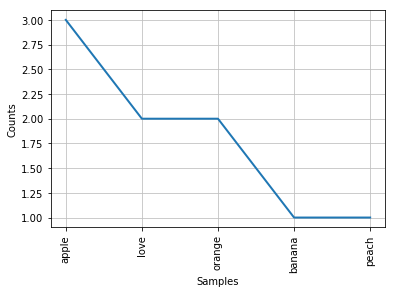

In [20]:
# 집계된 단어를 그래프로 표시
# nltk 내부적으로 그래프 그리는 기능이 존재함.
g_data4 = nltk.Text(data4, name='다빈도 단어 그래프 출력')
g_data4.plot(10) # 많이 언급된 순으로 10개만 그리기.

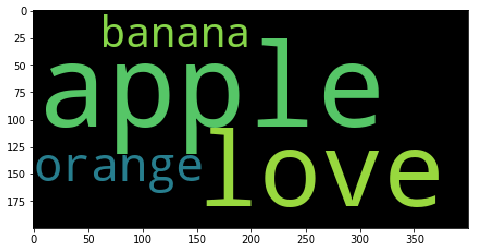

In [21]:
# Word Cloud 그리기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# font를 따로 지정할거면 font_path='폰트경로' 인자 추가.
wordcloud = WordCloud(relative_scaling = 0.2,
                      background_color = 'black').generate_from_frequencies(data7)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

**스탠포드 대학교 졸업식에서 연설한 스티브 잡스의 연설문 분석**

In [28]:
data1 = open('UseData/steve.txt').read()
data1

'\'You\'ve got to find what you love,\' Jobs says\n\nThis is the text of the Commencement address by Steve Jobs, CEO of Apple Computer and of Pixar Animation Studios, delivered on June 12, 2005.\n\n \nI am honored to be with you today at your commencement from one of the finest universities in the world. I never graduated from college. Truth be told, this is the closest I\'ve ever gotten to a college graduation. Today I want to tell you three stories from my life. That\'s it. No big deal. Just three stories. \n\nThe first story is about connecting the dots. \nI dropped out of Reed College after the first 6 months, but then stayed around as a drop-in for another 18 months or so before I really quit. So why did I drop out? \n\nIt started before I was born. My biological mother was a young, unwed college graduate student, and she decided to put me up for adoption. She felt very strongly that I should be adopted by college graduates, so everything was all set for me to be adopted at birth 

In [29]:
# word_tokenize()는 축약형을 제대로 분리하지 못하므로
# PunctTokenizer를 사용.
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
new_data2 = tokenizer.tokenize(data1)
new_data2

["'",
 'You',
 "'",
 've',
 'got',
 'to',
 'find',
 'what',
 'you',
 'love',
 ",'",
 'Jobs',
 'says',
 'This',
 'is',
 'the',
 'text',
 'of',
 'the',
 'Commencement',
 'address',
 'by',
 'Steve',
 'Jobs',
 ',',
 'CEO',
 'of',
 'Apple',
 'Computer',
 'and',
 'of',
 'Pixar',
 'Animation',
 'Studios',
 ',',
 'delivered',
 'on',
 'June',
 '12',
 ',',
 '2005',
 '.',
 'I',
 'am',
 'honored',
 'to',
 'be',
 'with',
 'you',
 'today',
 'at',
 'your',
 'commencement',
 'from',
 'one',
 'of',
 'the',
 'finest',
 'universities',
 'in',
 'the',
 'world',
 '.',
 'I',
 'never',
 'graduated',
 'from',
 'college',
 '.',
 'Truth',
 'be',
 'told',
 ',',
 'this',
 'is',
 'the',
 'closest',
 'I',
 "'",
 've',
 'ever',
 'gotten',
 'to',
 'a',
 'college',
 'graduation',
 '.',
 'Today',
 'I',
 'want',
 'to',
 'tell',
 'you',
 'three',
 'stories',
 'from',
 'my',
 'life',
 '.',
 'That',
 "'",
 's',
 'it',
 '.',
 'No',
 'big',
 'deal',
 '.',
 'Just',
 'three',
 'stories',
 '.',
 'The',
 'first',
 'story',
 'is'

In [30]:
# 축약된 단어를 분리하지 않고 그대로 출력하고자 한다면
# 정규식 표현 이용.
from nltk.tokenize.regexp import RegexpTokenizer

tokenizer2 = RegexpTokenizer("[\w']+")
new_data3 = tokenizer2.tokenize(data1)
new_data3

["'You've",
 'got',
 'to',
 'find',
 'what',
 'you',
 'love',
 "'",
 'Jobs',
 'says',
 'This',
 'is',
 'the',
 'text',
 'of',
 'the',
 'Commencement',
 'address',
 'by',
 'Steve',
 'Jobs',
 'CEO',
 'of',
 'Apple',
 'Computer',
 'and',
 'of',
 'Pixar',
 'Animation',
 'Studios',
 'delivered',
 'on',
 'June',
 '12',
 '2005',
 'I',
 'am',
 'honored',
 'to',
 'be',
 'with',
 'you',
 'today',
 'at',
 'your',
 'commencement',
 'from',
 'one',
 'of',
 'the',
 'finest',
 'universities',
 'in',
 'the',
 'world',
 'I',
 'never',
 'graduated',
 'from',
 'college',
 'Truth',
 'be',
 'told',
 'this',
 'is',
 'the',
 'closest',
 "I've",
 'ever',
 'gotten',
 'to',
 'a',
 'college',
 'graduation',
 'Today',
 'I',
 'want',
 'to',
 'tell',
 'you',
 'three',
 'stories',
 'from',
 'my',
 'life',
 "That's",
 'it',
 'No',
 'big',
 'deal',
 'Just',
 'three',
 'stories',
 'The',
 'first',
 'story',
 'is',
 'about',
 'connecting',
 'the',
 'dots',
 'I',
 'dropped',
 'out',
 'of',
 'Reed',
 'College',
 'after',


In [31]:
# 불용어 제거
data4 = [each_word for each_word in new_data3
         if each_word not in stopwords.words()]
data4

["'You've",
 'got',
 'find',
 'love',
 "'",
 'Jobs',
 'says',
 'This',
 'text',
 'Commencement',
 'address',
 'Steve',
 'Jobs',
 'CEO',
 'Apple',
 'Computer',
 'Pixar',
 'Animation',
 'Studios',
 'delivered',
 'June',
 '12',
 '2005',
 'I',
 'honored',
 'today',
 'commencement',
 'finest',
 'universities',
 'world',
 'I',
 'never',
 'graduated',
 'college',
 'Truth',
 'told',
 'closest',
 "I've",
 'ever',
 'gotten',
 'college',
 'graduation',
 'Today',
 'I',
 'tell',
 'three',
 'stories',
 'life',
 "That's",
 'No',
 'big',
 'deal',
 'Just',
 'three',
 'stories',
 'The',
 'first',
 'story',
 'connecting',
 'dots',
 'I',
 'dropped',
 'Reed',
 'College',
 'first',
 '6',
 'months',
 'stayed',
 'around',
 'drop',
 'another',
 '18',
 'months',
 'I',
 'really',
 'quit',
 'So',
 'I',
 'drop',
 'It',
 'started',
 'I',
 'born',
 'My',
 'biological',
 'mother',
 'young',
 'unwed',
 'college',
 'graduate',
 'student',
 'decided',
 'put',
 'adoption',
 'She',
 'felt',
 'strongly',
 'I',
 'adopted',


In [32]:
# 단어별 언급빈도 집계
from collections import Counter

data5 = Counter(data4)
data6 = data5.most_common(100)
data7 = dict(data6)

data7

{'I': 86,
 'And': 18,
 'It': 17,
 'life': 15,
 'college': 12,
 'Apple': 9,
 'would': 9,
 'years': 9,
 'never': 8,
 'The': 7,
 'dropped': 7,
 'months': 7,
 'looking': 7,
 'love': 6,
 'first': 6,
 'So': 6,
 'later': 6,
 'great': 6,
 'know': 6,
 'Stay': 6,
 'got': 5,
 'find': 5,
 'ever': 5,
 'started': 5,
 'My': 5,
 'decided': 5,
 'everything': 5,
 'But': 5,
 'work': 5,
 'best': 5,
 'every': 5,
 'get': 5,
 'way': 5,
 'If': 5,
 'something': 5,
 'company': 5,
 "Don't": 5,
 'death': 5,
 'This': 4,
 'No': 4,
 'dots': 4,
 'put': 4,
 'parents': 4,
 'course': 4,
 'found': 4,
 'go': 4,
 'going': 4,
 'made': 4,
 'loved': 4,
 'turned': 4,
 'computer': 4,
 'connect': 4,
 'fired': 4,
 'heart': 4,
 'Pixar': 3,
 'today': 3,
 'graduated': 3,
 'told': 3,
 'closest': 3,
 "I've": 3,
 'tell': 3,
 'three': 3,
 'story': 3,
 'drop': 3,
 'really': 3,
 'mother': 3,
 'She': 3,
 'wife': 3,
 'last': 3,
 'We': 3,
 'final': 3,
 'someday': 3,
 'almost': 3,
 'class': 3,
 'trust': 3,
 'time': 3,
 'back': 3,
 'calligraph

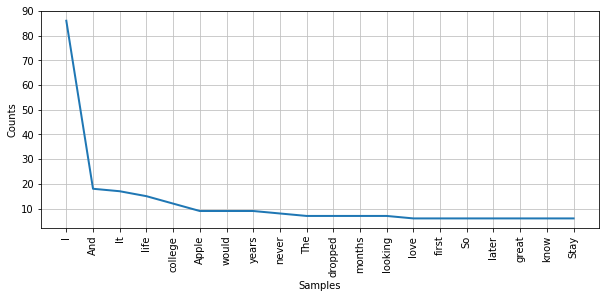

In [33]:
# 집계된 단어를 그래프로 표현
plt.figure(figsize=(10,4))
g_data4 = nltk.Text(data4, name='다빈도 단어 그래프')
g_data4.plot(20)

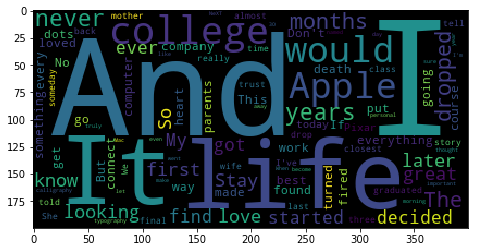

In [34]:
# Word Cloud 그리기
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(relative_scaling = 0.2,
                      background_color = 'black').generate_from_frequencies(data7)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

    그린거 보니 I, And, It 같은 불필요한 불용어가 같이 있는걸 볼 수 있음.
    기본 불용어 사전엔 얘네들이 없기 때문.
    
    추가적인 불용어 제거가 필요.

In [35]:
# 불용어가 추가된 사전 load.
stop_words = open('UseData/eng_stop_word.txt').read()
stop_words

'and\nAnd\nbut\nnot\none\nThe\nSo\nMy\nBut\ngot\nWe\nget\nput\n'

In [37]:
# 추가된 사전을 이용해 불용어 제거.
new_data4 = [each_word for each_word in data4
             if each_word not in stop_words]
new_data4

["'You've",
 'find',
 'love',
 "'",
 'Jobs',
 'says',
 'This',
 'text',
 'Commencement',
 'address',
 'Steve',
 'Jobs',
 'CEO',
 'Apple',
 'Computer',
 'Pixar',
 'Animation',
 'Studios',
 'delivered',
 'June',
 '12',
 '2005',
 'I',
 'honored',
 'today',
 'commencement',
 'finest',
 'universities',
 'world',
 'I',
 'never',
 'graduated',
 'college',
 'Truth',
 'told',
 'closest',
 "I've",
 'ever',
 'gotten',
 'college',
 'graduation',
 'Today',
 'I',
 'tell',
 'three',
 'stories',
 'life',
 "That's",
 'No',
 'big',
 'deal',
 'Just',
 'three',
 'stories',
 'first',
 'story',
 'connecting',
 'dots',
 'I',
 'dropped',
 'Reed',
 'College',
 'first',
 '6',
 'months',
 'stayed',
 'around',
 'drop',
 'another',
 '18',
 'months',
 'I',
 'really',
 'quit',
 'I',
 'drop',
 'It',
 'started',
 'I',
 'born',
 'biological',
 'mother',
 'young',
 'unwed',
 'college',
 'graduate',
 'student',
 'decided',
 'adoption',
 'She',
 'felt',
 'strongly',
 'I',
 'adopted',
 'college',
 'graduates',
 'everything

In [38]:
# I 같은 단어는 어떻게?
# 1글자 이하이거나 10글자 이상인 단어들 삭제로 처리.
new_data5 = []
for i in range(0, len(new_data4)) :
    if len(new_data4[i]) >= 2 | len(new_data4[i]) <= 10 :
        new_data5.append(new_data4[i])
        
# 처리된 단어를 counter로 다시 집계.
data5 = Counter(new_data5)
data6 = data5.most_common(100)
data7 = dict(data6)
data7

{'It': 17,
 'college': 12,
 'dropped': 7,
 'months': 7,
 'looking': 7,
 'started': 5,
 'decided': 5,
 'everything': 5,
 'way': 5,
 'If': 5,
 'company': 5,
 'No': 4,
 'parents': 4,
 'course': 4,
 'turned': 4,
 'connect': 4,
 'closest': 3,
 'really': 3,
 'mother': 3,
 'She': 3,
 'someday': 3,
 'almost': 3,
 'typography': 3,
 'Mac': 3,
 'let': 3,
 '30': 3,
 'thought': 3,
 'become': 3,
 "I'm": 3,
 'day': 3,
 'morning': 3,
 'cancer': 3,
 'Hungry': 3,
 'Foolish': 3,
 'finest': 2,
 'stories': 2,
 'big': 2,
 'College': 2,
 'another': 2,
 'biological': 2,
 'adopted': 2,
 'minute': 2,
 'wanted': 2,
 'Of': 2,
 '17': 2,
 'six': 2,
 'see': 2,
 'entire': 2,
 'pretty': 2,
 'classes': 2,
 'looked': 2,
 'country': 2,
 'Because': 2,
 'ten': 2,
 'single': 2,
 'likely': 2,
 'forward': 2,
 'somehow': 2,
 'future': 2,
 'You': 2,
 'garage': 2,
 '10': 2,
 'someone': 2,
 'run': 2,
 'things': 2,
 'generation': 2,
 'failure': 2,
 'events': 2,
 'bit': 2,
 'successful': 2,
 'amazing': 2,
 'family': 2,
 'yet': 2,
 

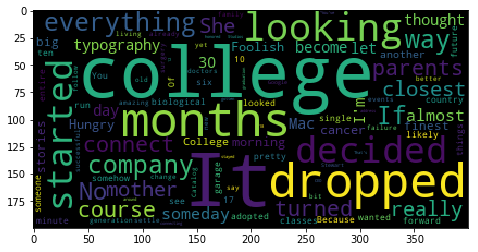

In [39]:
# WordCloud 다시 그리기
wordcloud = WordCloud(relative_scaling = 0.2,
                      background_color = 'black').generate_from_frequencies(data7)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

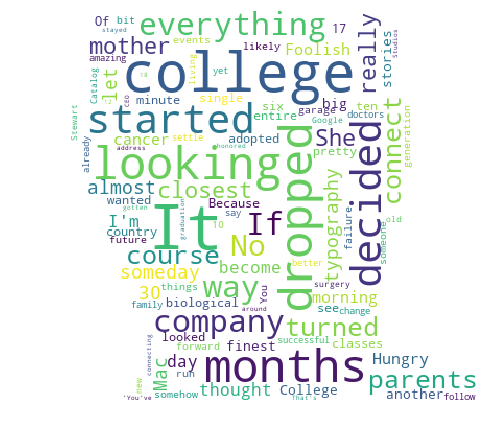

In [40]:
# 스티브 잡스의 사진을 가져와서 그 형태로 클라우드 그리기?
# masking 활용.

import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

steve_mask = np.array(Image.open('UseData/steve.jpg'))
wc = WordCloud(relative_scaling = 0.4,
               mask = steve_mask,
               background_color = 'white',
               min_font_size = 1,
               max_font_size = 60,
               max_words = 2000).generate_from_frequencies(data7)
plt.figure(figsize = (8, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()

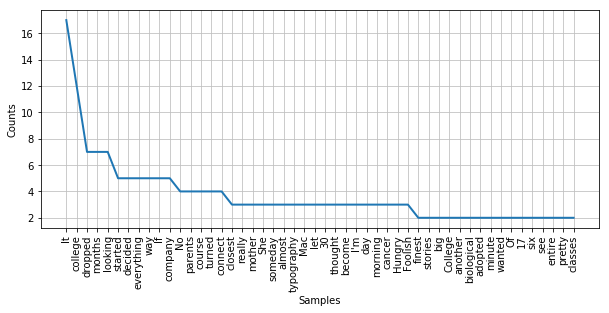

In [42]:
# 최종적으로 걸려진 단어들을 한번 보자.
plt.figure(figsize=(10,4))
g_data5 = nltk.Text(new_data5, name='다빈도 단어 그래프')
g_data5.plot(50)